##  Malaria - Key Facts and Overview
- Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable.
- In 2017, there were an estimated **219 million** cases of malaria in **87 countries**.
- The estimated number of malaria deaths stood at **435 000** in 2017.
- The WHO African Region carries a disproportionately high share of the global malaria burden. In 2017, the region was home to **92%** of malaria cases and **93%** of malaria deaths.
- Total funding for malaria control and elimination reached an estimated **US dollar 3.1billion** 

Malaria is caused by **Plasmodium parasites.** The parasites are spread to people through the bites of infected female Anopheles mosquitoes, called **"malaria vectors.**" There are 5 parasite species that cause malaria in humans, and 2 of these species – **P. falciparum** and **P. vivax** – pose the greatest threat.
[source](https://www.who.int/news-room/fact-sheets/detail/malaria)

 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Anopheles_stephensi.jpeg/1200px-Anopheles_stephensi.jpeg" width="400" />
 
 
#### Signs and symptoms
 A malaria infection is generally characterized by the following signs and symptoms:
- Fever
- Chills
- Headache
- Nausea and vomiting
- Muscle pain and fatigue

Other signs and symptoms may include:
- Sweating
- Chest or abdominal pain
- Cough

 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Symptoms_of_Malaria.png/848px-Symptoms_of_Malaria.png" width="300" />


#### Diagnosis: 
Malaria is typically diagnosed by the microscopic examination of blood using blood films, or with antigen-based rapid diagnostic tests.


#### Risk Factor:
Malaria is commonly associated with poverty and has a major negative effect on economic development. In Africa, it is estimated to result in losses of US$12 billion a year due to increased healthcare costs, lost ability to work, and negative effects on tourism.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Malaria_world_map-Deaths_per_million_persons-WHO2012.svg/1200px-Malaria_world_map-Deaths_per_million_persons-WHO2012.svg.png" width="600" />
 
 Reference:
1.  [WHO](https://www.who.int/news-room/fact-sheets/detail/malaria) 
2. [Wikipedia](https://en.wikipedia.org/wiki/Malaria)

##  Importing Libraries<a id='step-1'></a>

In [1]:
 # linear algebra
import numpy as np

# data processing
import pandas as pd

# data evaluation
from sklearn.metrics import roc_curve,auc,classification_report

# data plotting 
import matplotlib.pyplot as plt

# data model required libaries
from PIL import Image
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random
import os
from mlxtend.plotting import plot_confusion_matrix

## Loading Data<a id='step-2'></a>
 - Create separate directory to store Parasitized and Normal images (Uninfected)

In [2]:
# setting path of directory
PARA_DIR = 'C:/Users/galap/ML - Projects/Malarial Infection CNN/archive/cell_images/Parasitized/'
NORM_DIR =  'C:/Users/galap/ML - Projects/Malarial Infection CNN/archive/cell_images/Uninfected/'

# storing all the files from directories PARA_DIR and NORM_DIR to Pimages and Nimages for accessing images directly
Pimages = os.listdir(PARA_DIR)
Nimages = os.listdir(NORM_DIR)

## Visualization<a id='step-3'></a>
- Check the actual sample images of both infected and normal blood sample

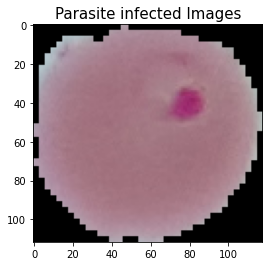

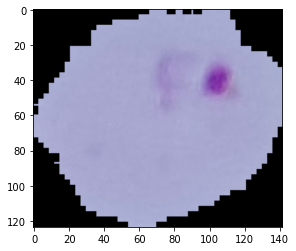

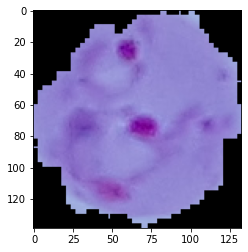

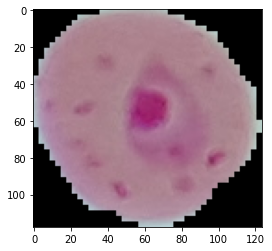

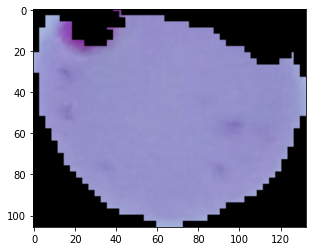

In [3]:
# Infected Parasites
infected_parasite = random.sample(Pimages,6)
plt.title('Parasite infected Images',fontsize=15)
for i in range(0,5):
    im = cv2.imread(PARA_DIR + infected_parasite[i])
    plt.imshow(im)
    plt.show()
    
plt.show()

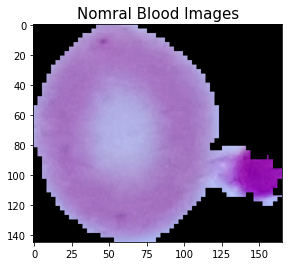

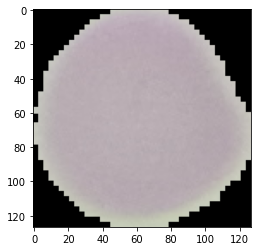

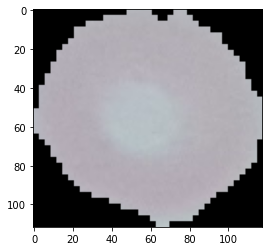

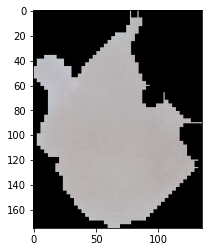

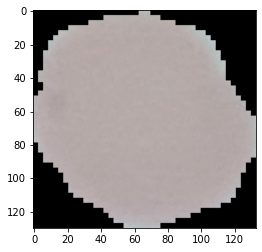

In [4]:
# Infected Parasites


uninfected_parasite = random.sample(Nimages,6)
plt.title('Nomral Blood Images',fontsize=15)
for i in range(0,5):
    im = cv2.imread(NORM_DIR + uninfected_parasite[i])
    plt.imshow(im)
    plt.show()
    
plt.show()

## Data Preprocessing (Labeling & Resizing of images)<a id='step-4'></a>

In [5]:
data=[]
labels=[]
#PARA_DIR = 'C:/Users/galap/ML - Projects/Malarial Infection CNN/archive/cell_images/Parasitized/'
#NORM_DIR =  'C:/Users/galap/ML - Projects/Malarial Infection CNN/archive/cell_images/Uninfected/'

for a in Pimages:
    try:
        image=cv2.imread(PARA_DIR+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")


for b in Nimages:
    try:
        image=cv2.imread(NORM_DIR+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [6]:
# segregating data and labels
Cells=np.array(data)
labels=np.array(labels)

np.save("Cells",Cells)
np.save("labels",labels)

In [7]:
# loading data of cell images and labels of images
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [8]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

num_classes=len(np.unique(labels))
len_data=len(Cells)

##  Train- Test Split<a id='step-5'></a>

In [9]:
# splitting cells images into 90:10 ratio i.e., 90% for training and 10% for testing purpose
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]

(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

## Normalizing and Label Ecoding the Data<a id='step-6'></a>

In [10]:
# normalizing 
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

# Doing One hot encoding as classifier has multiple classes
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

## Model Building: CNN<a id='step-8'></a>

In [11]:
# Set random seed
np.random.seed(0)

#creating sequential model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4

## Compiling the model<a id='step-9'></a>

In [12]:
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Setting Callbacks<a id='step-10'></a>

In [13]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

## Model Fitting<a id='step-11'></a>

In [14]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
h=model.fit(x_train,y_train,batch_size=32,callbacks=callbacks, validation_data=(x_test,y_test),epochs=20,verbose=1)

Epoch 1/20
776/776 [==============================] - 23s 30ms/step - loss: 0.4829 - accuracy: 0.7435 - val_loss: 0.2044 - val_accuracy: 0.9394
Epoch 2/20
776/776 [==============================] - 23s 29ms/step - loss: 0.1805 - accuracy: 0.9451 - val_loss: 0.1523 - val_accuracy: 0.9561
Epoch 3/20
776/776 [==============================] - 22s 29ms/step - loss: 0.1623 - accuracy: 0.9505 - val_loss: 0.1495 - val_accuracy: 0.9546
Epoch 4/20
776/776 [==============================] - 22s 29ms/step - loss: 0.1527 - accuracy: 0.9526 - val_loss: 0.1434 - val_accuracy: 0.9590
Epoch 5/20
776/776 [==============================] - 22s 29ms/step - loss: 0.1508 - accuracy: 0.9521 - val_loss: 0.1353 - val_accuracy: 0.9601
Epoch 6/20
776/776 [==============================] - 22s 29ms/step - loss: 0.1435 - accuracy: 0.9541 - val_loss: 0.1429 - val_accuracy: 0.9546
Epoch 7/20
776/776 [==============================] - 23s 30ms/step - loss: 0.1371 - accuracy: 0.9546 - val_loss: 0.1327 - val_accuracy:

## Model Evaluation<a id='step-12'></a>

In [15]:
# saving the weight of model
from numpy import loadtxt
from keras.models import load_model
model = load_model('.mdl_wts.hdf5')

#checking the score of the model
score=model.evaluate(x_test,y_test)
print(score)

87/87 [==============================] - 1s 6ms/step - loss: 0.1240 - accuracy: 0.9612
[0.1240028440952301, 0.9611615538597107]


In [16]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

87/87 [==============================] - 1s 6ms/step - loss: 0.1240 - accuracy: 0.9612

 Test_Accuracy:- 0.9611615538597107


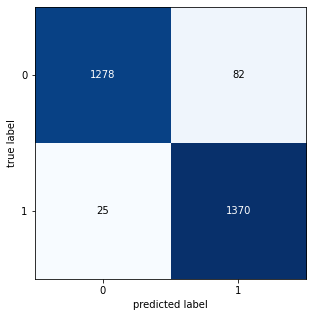

In [17]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

#creating confusion matrix
CM = confusion_matrix(y_true, pred)
# plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

### Plotting History of Model's Accuracy 

In [18]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

<ipython-input-18-21a1cb06bcb9>:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-18-21a1cb06bcb9>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


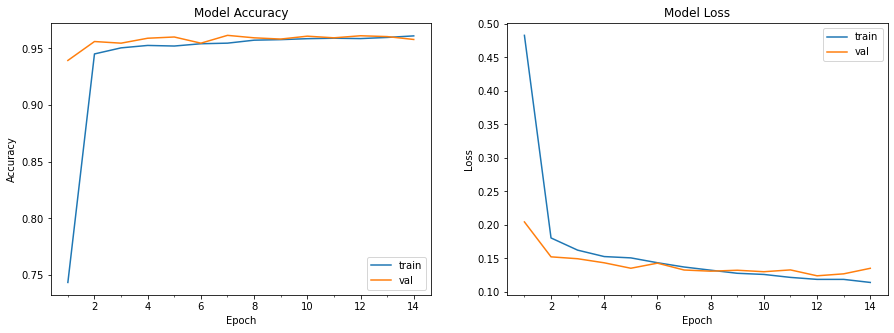

In [19]:
plot_model_history(h)

## Plotting Sample Prediction (Groundtruth vs Predicted)<a id='step-14'></a>

In [20]:
y_hat = model.predict(x_test)

# define text labels 
malaria_labels = ['Parasitized','Uninfected']

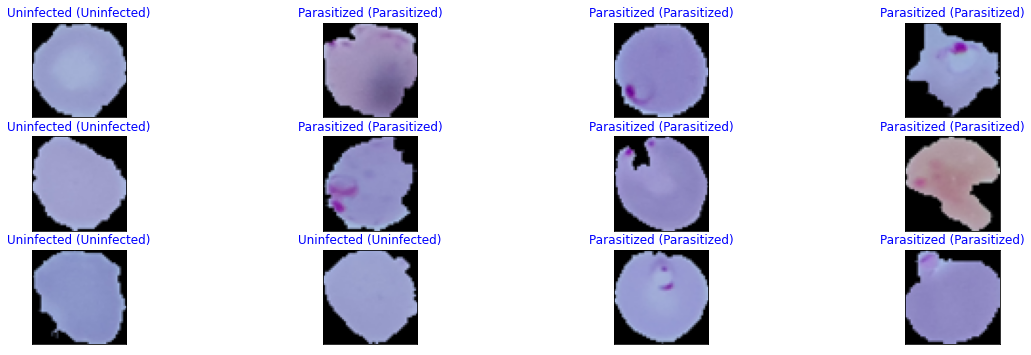

In [21]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(malaria_labels[pred_idx], malaria_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "orange"))

## Conclusion
- As we have seen our model is giving approx 96% recall and auc of around 96.36 which is good overall.
- Further, we can also do data augmentation to increase the dataset and improve the accuracy
- The only misclassified instance shown in our random sample plotting has seems to have a small mark but in real its not which our model errorneously understand as a mark and therefore predicted as infected sample.